In [163]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from functions import gauss, crystalball, freedman, decay

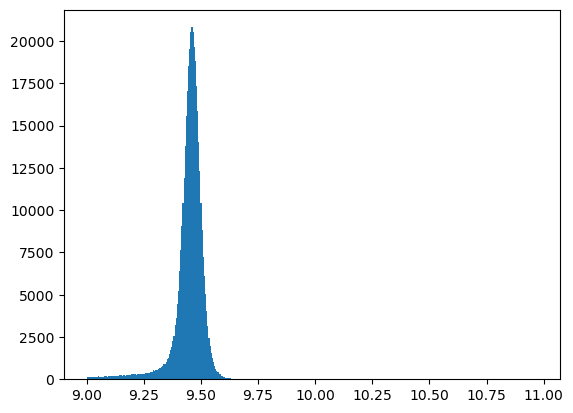

In [164]:
xmass = np.load('mc_anal/xmass_mc.npy')
count, bin, patches = plt.hist(xmass, bins = 400)
bins = bin[1:] - (bin[1]-bin[0])/2

In [165]:
def lsq(a, mu, sig):
    return np.sum((count-gauss(bins,a,mu,sig)) **2)

In [166]:
m = Minuit(lsq, a = 20000, mu = 9.45, sig = 0.03)

In [167]:
m.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/2655901613.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.177e+07                  │              Nfcn = 75               │
│ EDM = 0.000158 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │20.15747e3 │ 0.00035e3 │            │            │         │         │       │
│ 1 │ mu   │ 9.4610225 │ 0.0000007 │            │            │         │         │       │
│ 2 │ sig  │35.8205e-3 │ 0.0007e-3 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────┐
│     │         a        mu       sig │
├─────┼───────────────────────────────┤
│   a │     0.122  5.57e-09 -1.56e-07 │
│  mu │  5.57e-09  4.91e-13 -1.98e-14 │
│ sig │ -1.56e-07 -1.98e-14  5.55e-13 │
└─────┴───────────────────────────────┘

In [168]:
a_fit = m.values['a']
mu_fit = m.values['mu']
sig_fit = m.values['sig']
print(a_fit, mu_fit, sig_fit)

20157.474999701582 9.461022525565301 0.03582050830569668


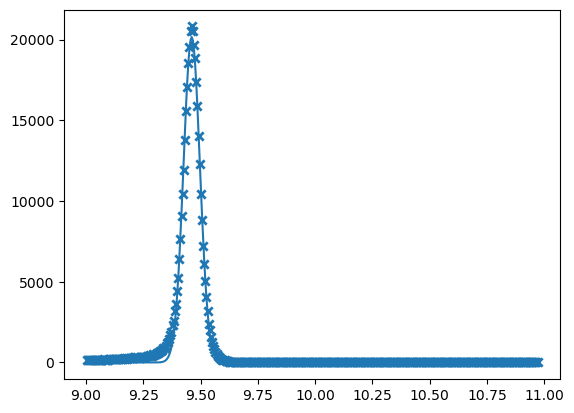

In [169]:
plt.plot(bins, gauss(bins, a_fit, mu_fit, sig_fit))
plt.scatter(bins, count, marker = 'x', lw=2)

In [170]:
def lsq_cb(alpha, n, mu, sig):
    return np.sum((count-crystalball(bins,alpha, n,mu,sig)) **2)


In [171]:
cb = Minuit(lsq_cb, alpha = 2, n=0.9, mu = 9.45, sig = 0.03)

In [172]:
cb.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/3740381741.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.154e+07                  │              Nfcn = 320              │
│ EDM = 1.08e+03 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │1.42041501 │0.00000004 │            │            │         │         │       │
│ 1 │ n     │899.990432e-3│0.000007e-3│            │            │         │         │       │
│ 2 │ mu    │ 9.4619632 │ 0.0000007 │            │            │         │         │       │
│ 3 │ sig   │33.8945e-3 │ 0.0007e-3 │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  1.29e-15   2.6e-16  6.44e-17 -1.53e-15 │
│     n │   2.6e-16  5.35e-17 -1.82e-17  1.17e-16 │
│    mu │  6.44e-17 -1.82e-17  4.86e-13 -4.41e-14 │
│   sig │ -1.53e-15  1.17e-16 -4.41e-14   5.3e-13 │
└───────┴─────────────────────────────────────────┘

1384.0


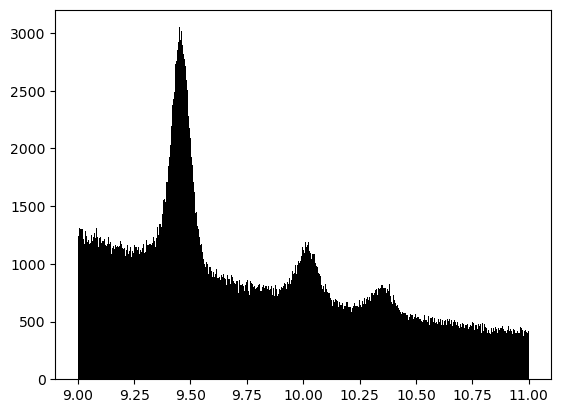

In [173]:
xmass_ups = np.load('ups_anal/xmass.npy')
 
Min = np.min(xmass_ups)
Max = np.max(xmass_ups)
_, n_bins = np.modf((Max-Min)/freedman(xmass))
print(n_bins)

count , bins_w, patches = plt.hist(xmass_ups, color = 'k', bins = int(0.75*n_bins), histtype= 'bar', range =(Min, Max), density=False )
bins = bins_w[1:] - (bins_w[1] - bins_w[0])/2

#histogram of the peaks from raw data
bins_1 = bins[(bins > 9.1) & (bins < 9.7)]
count_1 = count[(bins > 9.1) & (bins < 9.7)]

bins_2 = bins[(bins > 9.85) & (bins < 10.15)]
count_2 = count[(bins > 9.85) & (bins < 10.15)]

bins_3 = bins[(bins > 10.25) & (bins < 10.45)]
count_3 = count[(bins > 10.25) & (bins < 10.45)]

bins_back = np.concatenate((bins[(bins < 9.2) | (bins > 10.55)], bins[(bins > 9.7) & (bins < 9.8)]))
count_back= np.concatenate((count[(bins < 9.2) | (bins > 10.55)], count[(bins > 9.7) & (bins < 9.8)]))

In [174]:
def lsq_back(al,b):
    return np.sum((count_back-decay(bins_back,al,b)) **2)

In [175]:
m_dec = Minuit(lsq_back, al = 100000, b = 0.005)

In [176]:
m_dec.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/945649017.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_dec.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.988e+05                  │              Nfcn = 300              │
│ EDM = 2.22e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ al   │ 239.77e3  │  0.23e3   │            │            │         │         │       │
│ 1 │ b    │-582.02e-3 │  0.10e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       al        b │
├────┼───────────────────┤
│ al │ 5.15e+04  -0.0224 │
│  b │  -0.0224 9.79e-09 │
└────┴───────────────────┘

In [177]:
al_fit = m_dec.values['al']
b_fit = m_dec.values['b']

In [178]:
count_1_clean = count_1 - decay(bins_1, al_fit, b_fit)
count_2_clean = count_2 - decay(bins_2, al_fit, b_fit)
count_3_clean = count_3 - decay(bins_3, al_fit, b_fit)

In [179]:
def lsq_cb_1(alpha, n, mu, sig):
    return np.sum((count_1_clean-crystalball(bins_1,alpha, n,mu,sig)) **2)

def lsq_cb_2(alpha, n, mu, sig):
    return np.sum((count_2_clean-crystalball(bins_2,alpha, n,mu,sig)) **2)

def lsq_cb_3(alpha, n, mu, sig):
    return np.sum((count_3_clean-crystalball(bins_3,alpha, n,mu,sig)) **2)

In [180]:
cb_1 = Minuit(lsq_cb_1, alpha = 1.5, n = 0.9, mu = 9.45, sig = 0.04)
cb_2 = Minuit(lsq_cb_2, alpha = 1.5, n = 0.9, mu = 10.0, sig = 0.04)
cb_3 = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)


In [181]:
cb_1.migrad()
cb_2.migrad()
cb_3.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/1084956207.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_1.migrad()
/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/1084956207.py:2: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_2.migrad()
/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/1084956207.py:3: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_3.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.269e+04                  │              Nfcn = 686              │
│ EDM = 22.2 (Goal: 0.0002)        │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           ABOVE call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.5000   │  0.0015   │            │            │         │         │       │
│ 1 │ n     │ 911.99e-3 │  0.29e-3  │            │            │         │         │       │
│ 2 │ mu    │ 10.35103  │  0.00005  │            │            │         │         │       │
│ 3 │ sig   │ 46.75e-3  │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │   2.4e-06  4.51e-07 -3.76e-09  9.21e-09 │
│     n │  4.51e-07  8.45e-08 -7.69e-10  1.77e-09 │
│    mu │ -3.76e-09 -7.69e-10  2.52e-09 -3.24e-10 │
│   sig │  9.21e-09  1.77e-09 -3.24e-10  3.33e-09 │
└───────┴─────────────────────────────────────────┘

In [182]:
alpha_fit_1 = cb_1.values['alpha']
n_fit_1 = cb_1.values['n']
mu_fit_1 = cb_1.values['mu']
sig_fit_1 = cb_1.values['sig']

alpha_fit_2 = cb_2.values['alpha']
n_fit_2 = cb_2.values['n']
mu_fit_2 = cb_2.values['mu']
sig_fit_2 = cb_2.values['sig']

alpha_fit_3 = cb_3.values['alpha']
n_fit_3 = cb_3.values['n']
mu_fit_3 = cb_3.values['mu']
sig_fit_3 = cb_3.values['sig']



In [192]:
cb_2_fi = Minuit(lsq_cb_2, alpha = alpha_fit_2, n = n_fit_2, mu = mu_fit_2, sig = sig_fit_1 * (mu_fit_2/mu_fit_1))
cb_2_fi.fixed['sig'] = True
cb_3_fi = Minuit(lsq_cb_3, alpha = alpha_fit_3, n = n_fit_3, mu = mu_fit_3, sig = sig_fit_1 * (mu_fit_3/mu_fit_1))
cb_3_fi.fixed['sig'] = True
# cb_3_fi = Minuit(lsq_cb_3, alpha = 1.5, n = 0.9, mu = 10.3, sig = 0.04)

In [193]:
cb_2_fi.migrad()
cb_3_fi.migrad()

/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/3772212046.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_2_fi.migrad()
/var/folders/_r/353nz1r53xxbm376n76kwspr0000gn/T/ipykernel_56293/3772212046.py:2: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  cb_3_fi.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.38e+04                   │              Nfcn = 61               │
│ EDM = 4.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.50019  │  0.00021  │            │            │         │         │       │
│ 1 │ n     │ 911.95e-3 │  0.04e-3  │            │            │         │         │       │
│ 2 │ mu    │ 10.35116  │  0.00005  │            │            │         │         │       │
│ 3 │ sig   │  44.9e-3  │  0.4e-3   │            │            │         │         │  yes  │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  4.26e-08   7.9e-09 -6.49e-11         0 │
│     n │   7.9e-09  1.47e-09 -1.28e-11         0 │
│    mu │ -6.49e-11 -1.28e-11  2.11e-09         0 │
│   sig │         0         0         0         0 │
└───────┴─────────────────────────────────────────┘

<function matplotlib.pyplot.show(close=None, block=None)>

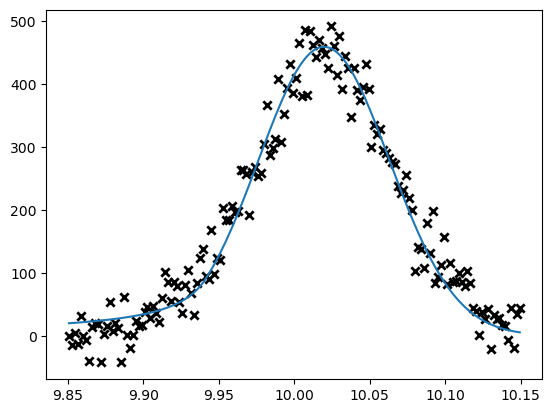

In [187]:
alpha_fit_2_fi = cb_2_fi.values['alpha']
n_fit_2_fi = cb_2_fi.values['n']
mu_fit_2_fi = cb_2_fi.values['mu']
sig_fit_2_fi = cb_2_fi.values['sig']

alpha_fit_3_fi = cb_3_fi.values['alpha']
n_fit_3_fi = cb_3_fi.values['n']
mu_fit_3_fi = cb_3_fi.values['mu']
sig_fit_3_fi = cb_3_fi.values['sig']


plt.scatter(bins_2, count_2_clean, marker = 'x', color = 'k', lw = 2)
plt.plot(bins_2, crystalball(bins_2, alpha_fit_2_fi, n_fit_2_fi, mu_fit_2_fi, sig_fit_2_fi))
plt.show

In [190]:
cb_2_fi.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.59e+05                   │             Nfcn = 2162              │
│ EDM = 0.000476 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  1.92625  │  0.00005  │  -0.00005  │  0.00005   │         │         │       │
│ 1 │ n     │967.123e-3 │ 0.004e-3  │ -0.004e-3  │  0.004e-3  │         │         │       │
│ 2 │ mu    │ 10.019481 │ 0.000022  │ -0.000022  │  0.000022  │         │         │       │
│ 3 │ sig   │  43.5e-3  │  0.4e-3   │            │            │         │         │  yes  │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │         alpha         │           n           │          mu           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.05e-3  │  0.05e-3  │   -4e-6   │   4e-6    │ -0.022e-3 │ 0.022e-3  │
│  Valid   │   False   │   False   │   False   │   False   │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   True    │   False   │   True    │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────────────────────┐
│       │     alpha         n        mu       sig │
├───────┼─────────────────────────────────────────┤
│ alpha │  2.07e-09  1.65e-10 -1.26e-12         0 │
│     n │  1.65e-10  1.32e-11 -1.03e-13         0 │
│    mu │ -1.26e-12 -1.03e-13  4.82e-10         0 │
│   sig │         0         0         0         0 │
└───────┴─────────────────────────────────────────┘